In [ ]:
# import libraries
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import plotnine as p9
import random
import numpy as np
from math import radians, cos, sin, asin, sqrt

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
# import data
df_cities = pd.read_csv("worldcities.csv")
df_cities = df_cities[['city', 'lat', 'lng']]
df_cities.head()

,city,lat,lng
0,Tokyo,35.6897,139.6922
1,Jakarta,-6.2146,106.8451
2,Delhi,28.6600,77.2300
3,Mumbai,18.9667,72.8333
4,Manila,14.6000,120.9833


In [ ]:
# function as given in class but modified
# helper function to normalize
def normalize(series):
    return (series - series.mean()) / series.std()

# helper function to calculate distance, using haversine function link given in assignment manual
def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

# k-means function and plot
def k_means(k, df):
    pts = [np.array(pt) for pt in zip(df['lng'], df['lat'])]
    centers = random.sample(pts, k)
    old_cluster_ids, cluster_ids = None, []
    while cluster_ids != old_cluster_ids:
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = -1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                dist = np.linalg.norm(haversine(pt[0], pt[1], center[0], center[1]))
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        df['cluster'] = cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
                       for match in range(k)]
        centers = [sum(pts)/len(pts) for pts in cluster_pts]

    # map cluster to color
    cluster_set = set(df["cluster"])
    colors = {}
    color = ['black', 'red', 'white', 'green', 'tan', 'orange', 'brown', 'blue', 'cyan', 'aqua', 'indigo', 'pink', 'darkcyan', 'yellow', 'lightsteelblue']
    c = 0
    for i in cluster_set:
        colors[i] = color[c]
        c += 1

    # plot figure with code given in assignment manual
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    lats = df['lat']
    lngs = df['lng']
    ax.coastlines()
    ax.plot(lngs, lats, "o", color=df['cluster'].map(colors), transform=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    plt.savefig("Q2.png")
    plt.show()

    # (p9.ggplot(df, p9.aes(x="lng", y="lat", color="cluster")) + p9.geom_point()).draw()

In [ ]:
# test function
print("Testing k_means function with k = 5...")
print(k_means(5, df_cities))

Testing k_means function with k = 7...
None


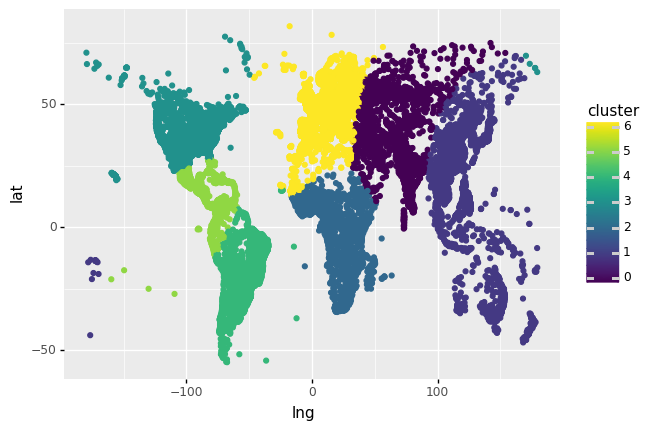

In [ ]:
print("Testing k_means function with k = 7...")
print(k_means(7, df_cities))

Testing k_means function with k = 15...
None


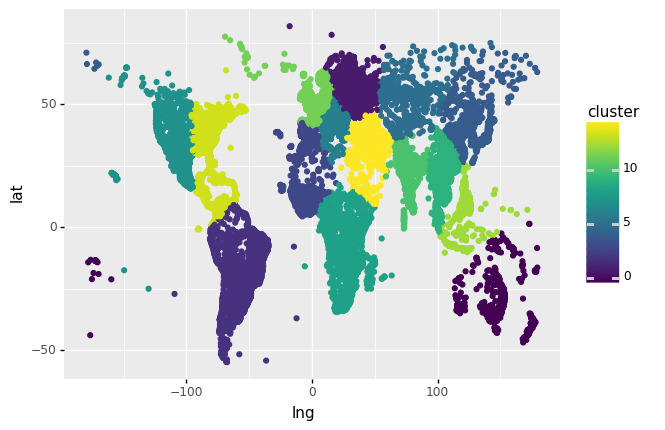

In [ ]:
print("Testing k_means function with k = 15...")
print(k_means(15, df_cities))